## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

In [2]:
filepath = 'newData/flipkart_cleaned.csv'
flipkart = pd.read_csv(filepath)
flipkart.head(5)

,uniq_id,product_name,product_category_tree,pid,retail_price,discounted_price,discount,description,overall_rating,brand,product_specifications,percentage_discount
0,c2d766ca982eca8304150849735ffef9,alisha solid women's cycling shorts,"['clothing', ""women's clothing"", 'lingerie, sl...",srteh2ff9kedefgf,999.0,379.0,62.06,key features of alisha solid women's cycling s...,no rating available,alisha,number of contents in sales package: pack of 3...,62.062062
1,7f7036a6d550aaa89d34c77bd39a5e48,fabhomedecor fabric double sofa bed,"['furniture', 'living room furniture', 'sofa b...",sbeeh3qgu7mfyjfy,32157.0,22646.0,29.58,fabhomedecor fabric double sofa bed (finish co...,no rating available,fabhomedecor,installation & demo details: installation and ...,29.576764
2,f449ec65dcbc041b6ae5e6a32717d01b,aw bellies,"['footwear', ""women's footwear"", 'ballerinas',...",shoeh4grsubjgzxe,999.0,499.0,50.05,key features of aw bellies sandals wedges heel...,no rating available,aw,ideal for: women occasion: casual color: red o...,50.050050
3,0973b37acd0c664e3de26e97e5571454,alisha solid women's cycling shorts,"['clothing', ""women's clothing"", 'lingerie, sl...",srteh2f6huzmq6sj,699.0,267.0,61.80,key features of alisha solid women's cycling s...,no rating available,alisha,number of contents in sales package: pack of 2...,61.802575
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,sicons all purpose arnica dog shampoo,"['pet supplies', 'grooming', 'skin & coat care...",psoeh3zydmsyarj5,220.0,210.0,4.55,specifications of sicons all purpose arnica do...,no rating available,sicons,pet type: dog brand: sicons quantity: 500 ml m...,4.545455


In [3]:
orderdata = pd.read_csv("newData/synthetic_v2.csv")
orderdata = orderdata.rename(columns={'Product ID': 'uniq_id'})
orderdata

,Order ID,uniq_id,Product Quantity,Product Price Each,Order Total,Order Date,Purchase Address,User rating for the product,User ID,User Age,User Occupation,User Income,User Interests,User Ethnicity
0,O0000001,670fa51fcb7b828866f3b60e96c1e442,3,232.0,3241.0,2023-06-16,"914 Pine St., New York",3.3,U01357,38,Lawyer,83829,Electronics,Asian
1,O0000001,cf8712fe0b41c01c76d5a4063fc862da,1,974.0,3241.0,2023-06-16,"914 Pine St., New York",3.7,U01357,38,Lawyer,83829,Electronics,Asian
2,O0000001,b6d3caed0039e69f78317086b20e9cd5,1,199.0,3241.0,2023-06-16,"914 Pine St., New York",2.6,U01357,38,Lawyer,83829,Electronics,Asian
3,O0000002,bc505bf57a77c52abb94a2fdaf111382,2,299.0,3530.0,2023-05-11,"702 Main St., Los Angeles",1.0,U04068,33,Scientist,69315,Books; Fashion; Electronics,Hispanic
4,O0000002,3ed4ab98c1e9fea86b1758194ac8a5a9,1,418.0,3530.0,2023-05-11,"702 Main St., Los Angeles",3.5,U04068,33,Scientist,69315,Books; Fashion; Electronics,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124894,O0049998,8df2c39ae09adffa1ac885b4ad9f695c,1,999.0,2565.0,2023-03-20,"912 Main St., Houston",4.3,U04177,50,Manager,92726,Music; Books; Fitness,Other
124895,O0049999,26fc529ea4d74e57f4a9c7318d72c72a,3,20586.0,22486.0,2023-11-27,"655 Main St., New York",2.3,U03346,50,Accountant,47720,Sports,Hispanic
124896,O0049999,efec9e032a74d1b9e9ecdde3b1d5f8fb,3,950.0,22486.0,2023-11-27,"655 Main St., New York",1.9,U03346,50,Accountant,47720,Sports,Hispanic
124897,O0050000,ef55ce0c58f251ade90faf7d491a22dd,1,1749.0,4896.0,2023-08-21,"553 Elm St., Los Angeles",2.0,U02208,26,Teacher,65315,Sports,Hispanic


### User demographics

The average user has an income of $83,856, and the lowest income of a user is $30,000. The distribution has a skewness of 0.336, which shows that the distribution is relatively symmetrical. It also has a negative kurtosis, of -0.216, which shows that the distribution has lighter tails than a normal distribution

In [4]:
mean_income = orderdata["User Income"].mean()
skewness_income = skew(orderdata["User Income"])
kurtosis_income = kurtosis(orderdata["User Income"])

# Print the results
print(f"Mean of User Income: {mean_income}")
print(f"Skewness of User Income: {skewness_income}")
print(f"Kurtosis of User Income: {kurtosis_income}")

Mean of User Income: 82904.48048423126
Skewness of User Income: 0.33647393880418897
Kurtosis of User Income: -0.2297979751980317


/var/folders/rd/t3xtrw6x6cn_9qvx9ywrkj4c0000gn/T/ipykernel_45781/581039657.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='User Income', data=orderdata, palette=palette)


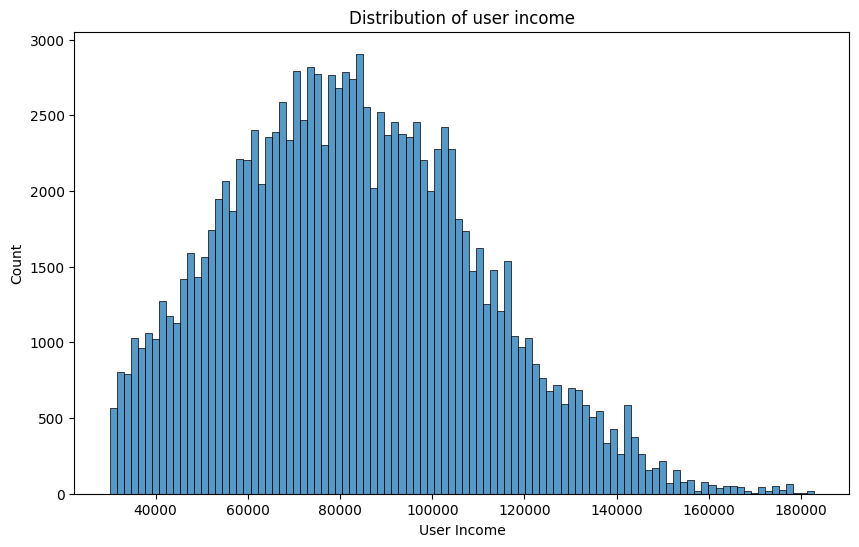

In [5]:
palette = sns.color_palette("RdBu", 10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(x='User Income', data=orderdata, palette=palette)
ax.set_title('Distribution of user income')

plt.show()

The user ethnicity is relatively uniformly distributed.

/var/folders/rd/t3xtrw6x6cn_9qvx9ywrkj4c0000gn/T/ipykernel_45781/3032691099.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='User Ethnicity', data=orderdata, palette=palette)


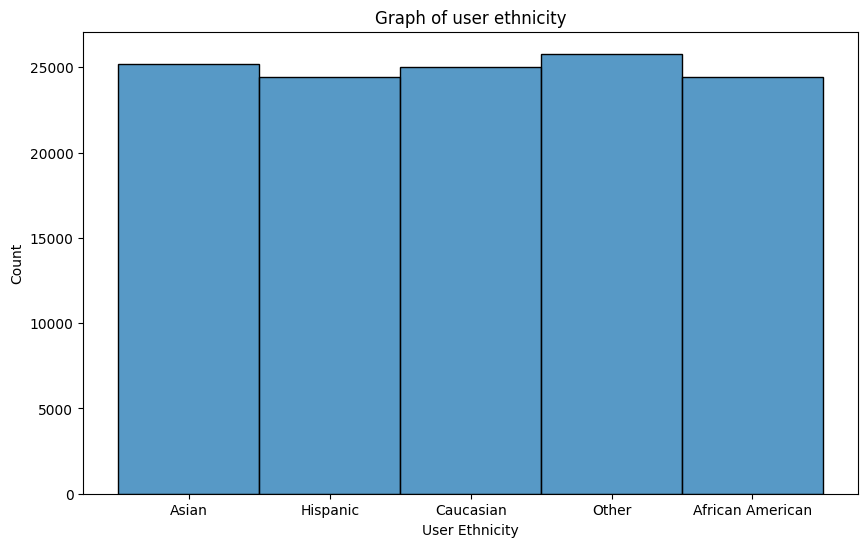

In [6]:
palette = sns.color_palette("RdBu", 10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(x='User Ethnicity', data=orderdata, palette=palette)
ax.set_title('Graph of user ethnicity')

plt.show()

The mean rating that users gave their purchased products is 3.014. The distribution of user ratings is somewhat symmetrical, considering that it has a skewness of -0.134. The negative kurtosis also indicates a lighter tail compared to a normal distribution.

In [7]:
mean_income = orderdata["User rating for the product"].mean()
skewness_income = skew(orderdata["User rating for the product"])
kurtosis_income = kurtosis(orderdata["User rating for the product"])

# Print the results
print(f"Mean of User Ratings: {mean_income}")
print(f"Skewness of User Ratings: {skewness_income}")
print(f"Kurtosis of User Ratings: {kurtosis_income}")

Mean of User Ratings: 3.013966484919815
Skewness of User Ratings: -0.13405100924038776
Kurtosis of User Ratings: -0.26394589467282037


/var/folders/rd/t3xtrw6x6cn_9qvx9ywrkj4c0000gn/T/ipykernel_45781/758320158.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='User rating for the product', data=orderdata, palette=palette, bins=10)


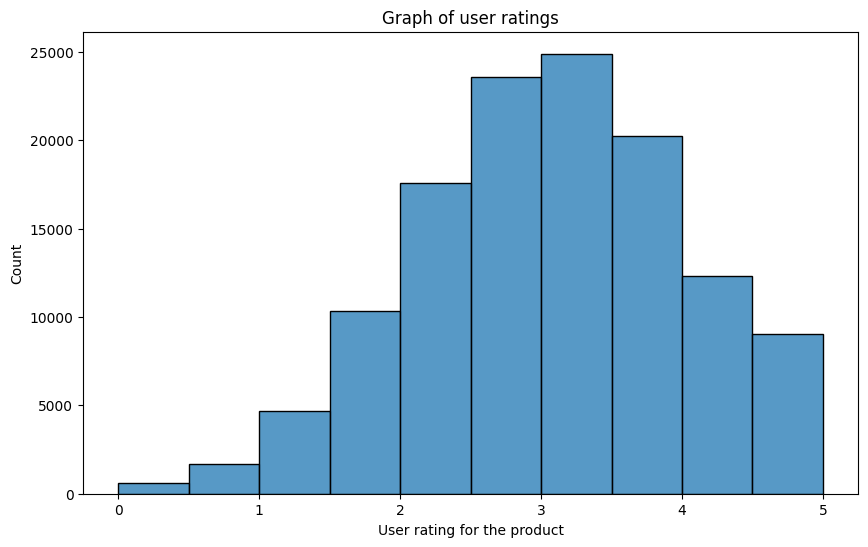

In [8]:
palette = sns.color_palette("RdBu", 10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(x='User rating for the product', data=orderdata, palette=palette, bins=10)
ax.set_title('Graph of user ratings')

plt.show()

The mean user age is 40 years. The distribution of the ages of users is relatively symmetrical, given the skewness is 0.140. The negative kurtosis of -0.514 indicates that the there are more data values located around the center of the distribution, rather than the tail ends. 

In [9]:
mean_income = orderdata["User Age"].mean()
skewness_income = skew(orderdata["User Age"])
kurtosis_income = kurtosis(orderdata["User Age"])

# Print the results
print(f"Mean of User Age: {mean_income}")
print(f"Skewness of User Age: {skewness_income}")
print(f"Kurtosis of User Age: {kurtosis_income}")

Mean of User Age: 40.29972217551782
Skewness of User Age: 0.13998697989330142
Kurtosis of User Age: -0.5139929374618086


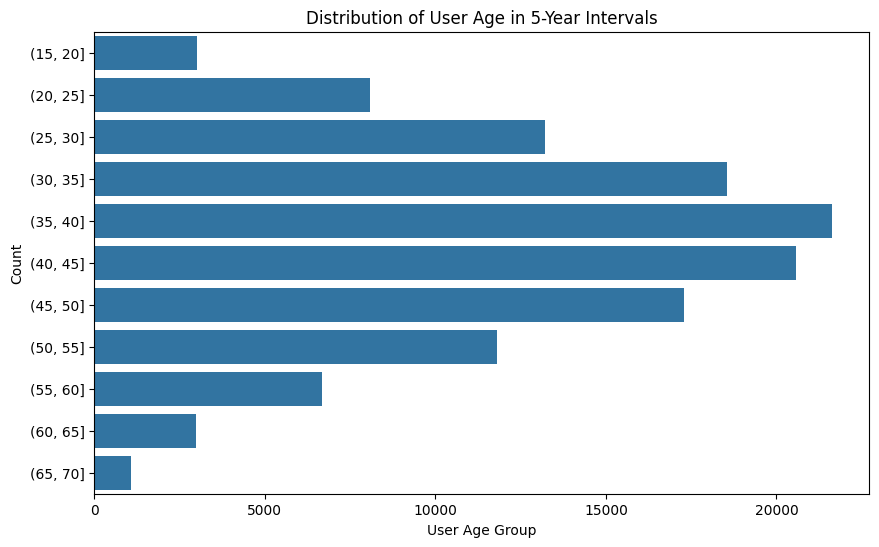

In [10]:
age_bins = pd.cut(orderdata['User Age'], bins=range(15, 75, 5))
age_bins = age_bins.astype('category')
age_bins = age_bins.cat.set_categories(age_bins.cat.categories, ordered=True)
plt.figure(figsize=(10, 6))
sns.countplot(age_bins)
plt.title('Distribution of User Age in 5-Year Intervals')
plt.xlabel('User Age Group')
plt.ylabel('Count')
plt.show()


### Product details

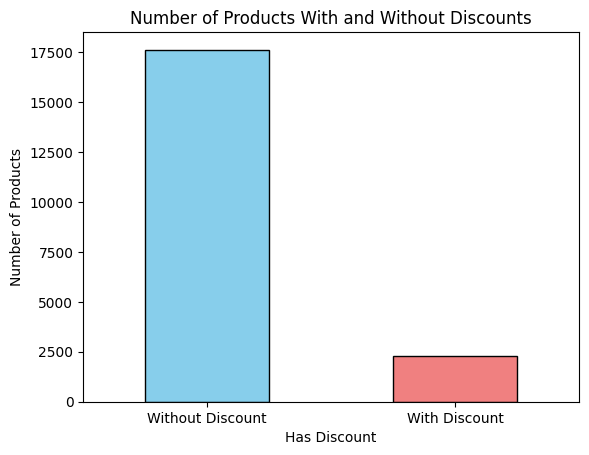

In [12]:
flipkart['has_discount'] = flipkart['discount'] > 0 
discount_counts = flipkart['has_discount'].value_counts()
discount_counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

plt.title('Number of Products With and Without Discounts')
plt.xlabel('Has Discount')
plt.ylabel('Number of Products')

plt.xticks([0, 1], ['Without Discount', 'With Discount'], rotation=0)

plt.show()


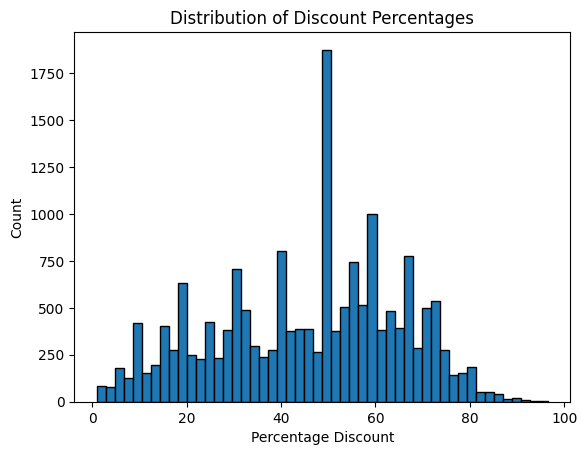

In [15]:
flipkart_discounted = flipkart[flipkart['has_discount'] == True]

plt.hist(flipkart_discounted['percentage_discount'], bins=50, edgecolor='black')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Percentage Discount')
plt.ylabel('Count')
plt.show()